# 주식 시세 현황 분석

네이버 주식에서 특정 기업의 주가를 가져와 데이터 프레임에 넣고, 그래프로 표시하는 실습

In [1]:
# 웹 스크래핑 가능 유무 확인을 위한 모듈 탑재
import requests

url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page=2'

# GET으로 해당 URL의 정보를 가져오기
page = requests.get(url)

In [2]:
# 정보를 txt 형태로 출력
print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

In [ ]:
# 헤더 정보 설정
my_headers = {'user-agent': 'Mozilla/5.0'}

page = requests.get(url, headers=my_headers)

In [ ]:
print(page.text)

In [ ]:
# Pandas 라이브러리 사용
import pandas as pd

pages = pd.read_html(page.text)

<ipython-input-38-8b7030d27dd3>:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pages = pd.read_html(page.text)


In [ ]:
type(pages)

list

In [ ]:
len(pages)

2

In [ ]:
pages[0]

In [ ]:
pages[1]

In [ ]:
# 페이지 번호를 제외한 주소
new_url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page='

# 데이터 프레임 생성
all_tables = pd.DataFrame()

for page_number in range(1, 5):

  # 페이지 번호 추가한 주소
  full_url = new_url + str(page_number)

  # 주소 확인
  print(f'{page_number} 번째 페이지 읽어오기({full_url})')

  page = requests.get(full_url, headers=my_headers)

  table = pd.read_html(page.text)[0]

  print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가\n')

  # 데이터 축적용 테이블에 데이터 프레임 추가
  all_tables = pd.concat([all_tables, table], ignore_index=True)

In [ ]:
# 전체 테이블 결과 확인
all_tables

In [ ]:
# 비어있는 데이터 삭제 후 확인
all_tables.dropna(inplace=True)

all_tables

In [ ]:
# 컬럼 네이밍 영어로 변경 후 확인
all_tables.rename(columns={
    '날짜': 'date',
    '종가': 'end_price',
    '고가': 'highest_price',
    '시가': 'start_price',
    '저가': 'lowest_price'
}, inplace=True)

all_tables

In [ ]:
# 전일비, 거래량 제거
all_tables.drop(['전일비', '거래량'], axis=1, inplace=True)

all_tables

In [ ]:
# 중앙값 추가
all_tables['mid_price'] = all_tables['highest_price'] - ((all_tables['highest_price'] - all_tables['lowest_price']) / 2)

all_tables

In [ ]:
# 월 정보 열 추가
all_tables['month'] = all_tables['date'].str[0:7]

all_tables

In [ ]:
# 날짜를 색인으로 지정
all_tables.set_index('date', inplace=True)

# 날짜를 오름차순으로 정렬
all_tables.sort_index(inplace=True)

all_tables

<Axes: xlabel='date'>

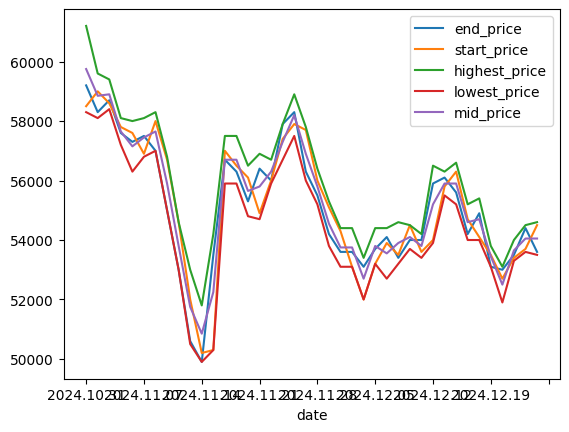

In [ ]:
# 선 그래프로 그리기
all_tables.plot.line()

<Axes: xlabel='date'>

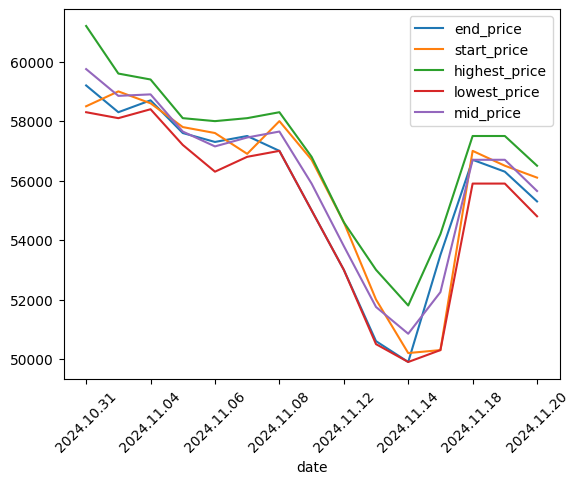

In [ ]:
# 앞 15일치 데이터 선 그래프로 그리기
all_tables[:15].plot.line(rot=45)

<Axes: title={'center': 'mid_price'}, xlabel='[month]'>

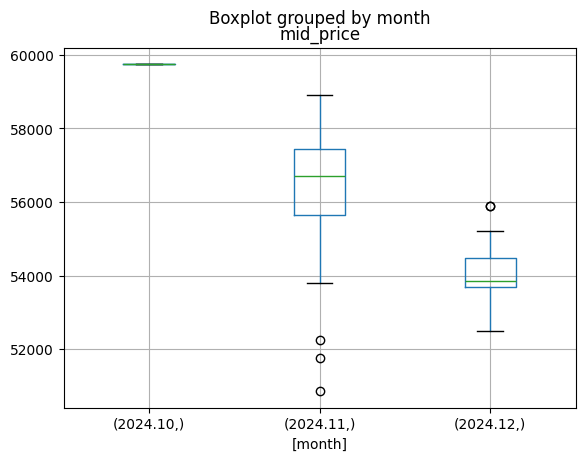

In [ ]:
# 일일 시세 중간값의 박스 수영 그래프 그리기
all_tables.boxplot(column=['mid_price'], by=['month'])